# Assignment 02

a)            Date  Price  time index
0    6/20/2022   32.2           0
1    6/21/2022   33.0           1
2    6/22/2022   33.0           2
3    6/23/2022   33.0           3
4    6/24/2022   35.0           4
..         ...    ...         ...
493   7/8/2024   58.0         493
494   7/9/2024   57.8         494
495  7/10/2024   58.0         495
496  7/11/2024   58.1         496
497  7/12/2024   58.2         497

[498 rows x 3 columns]
c)
log_returns:
 1      0.024541
2      0.000000
3      0.000000
4      0.058841
5      0.002853
         ...   
493    0.012142
494   -0.003454
495    0.003454
496    0.001723
497    0.001720
Name: Price, Length: 497, dtype: float64 

µGB : 0.001464343176110666
sigma 0.023382021704588307 

d)


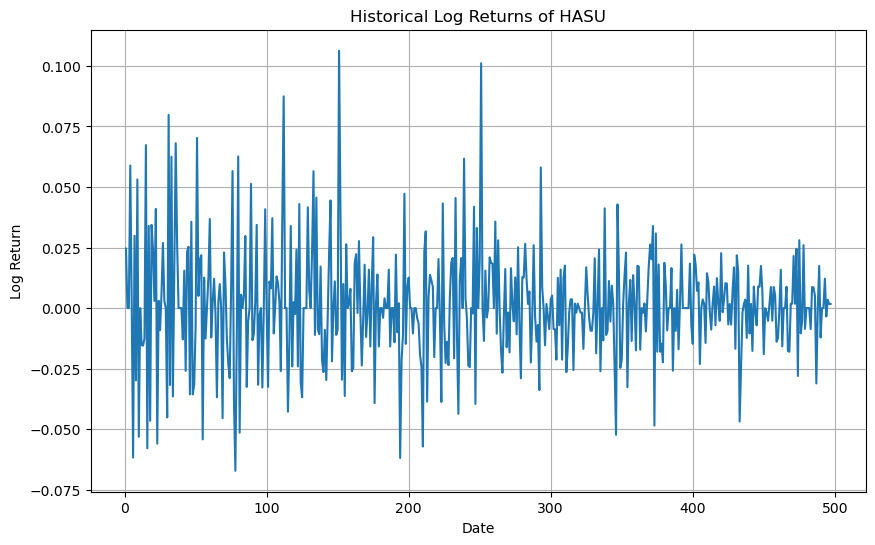

f)


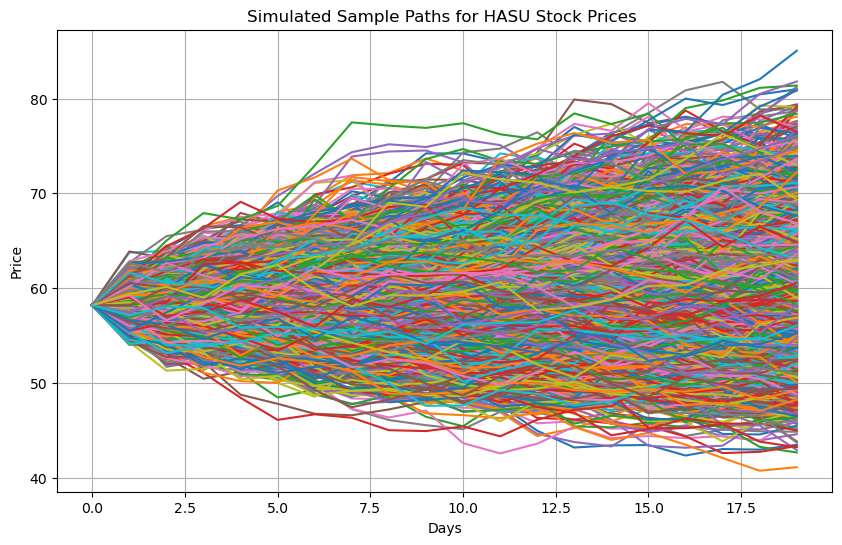

g)


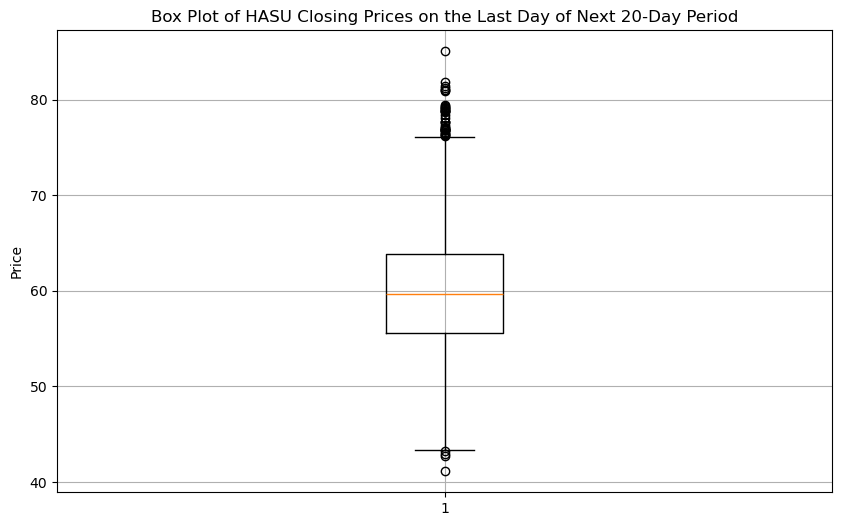

h) probability = 0.3066
i) prediction interval= [49.05120895 72.71516988]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file_path ='C:\\Users\\Dilini\\Desktop\\HASU Historical Data(2).csv'
data = pd.read_csv(file_path)
# Extract the closing prices
prices = data['Price']
# Read the CSV file
data_read = pd.read_csv(file_path)

#a)
# Display the entire DataFrame
print("a) ",data_read)

# (c) 
#Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()
print("c)")

#  Estimate drift (u_GB) and scale  parameters (sigma)
u_GB = log_returns.mean() + 0.5 * log_returns.var()
sigma = log_returns.std()
print("log_returns:\n",log_returns,"\n")
print("µGB :",u_GB)
print("sigma",sigma,"\n")

##########################
# (d) 
#Check whether it is appropriate to model the closing price of HASU using geometric Brownian motion
# Plot the historical log returns
print("d)")
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, log_returns)
plt.title('Historical Log Returns of HASU')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

##########################
# (e)
#Simulate 5000 possible sample paths for the closing price of HASU relevant to the next 20 days
n_simulations = 5000
n_days = 20
last_price = prices.iloc[-1]
dt = 1   # time step is 1 day

# Generate random paths
np.random.seed(42)
simulated_paths = np.zeros((n_days, n_simulations))
simulated_paths[0] = last_price
for t in range(1, n_days):
    Z = np.random.standard_normal(n_simulations)
    simulated_paths[t] = simulated_paths[t-1] * np.exp((u_GB - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
###############################
# (f) 
#Plot the sample paths
print("f)")
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths, lw=1.5)
plt.title('Simulated Sample Paths for HASU Stock Prices ')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

##################################
# (g) 
# box plot 
print("g)")
plt.figure(figsize=(10, 6))
plt.boxplot(simulated_paths[-1])
plt.title('Box Plot of HASU Closing Prices on the Last Day of Next 20-Day Period')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#################################
# (h) 
closing_prices_last_day = simulated_paths[-1]
probability_55_60 = np.mean((closing_prices_last_day >= 55) & (closing_prices_last_day <= 60))  #probability that the closing price will be between 55 and 60
print("h) probability =",probability_55_60)

###################################
# (i)
prediction_interval = np.percentile(closing_prices_last_day, [2.5, 97.5])
print("i) prediction interval=",prediction_interval)